# Yucatan hurricanes 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
URL = 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469'

df = pd.read_csv(URL, parse_dates=['start.date', 'end.date'])

In [11]:
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


In [10]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [13]:
df['duration'] = df['end.date'] - df['start.date']
df

,code,start.date,end.date,number,name,ss,track,rf.max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days
...,...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0,2 days
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2,6 days
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1,0 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [14]:
df_5 = df[df['ss'] == 5]
df_5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [15]:
import pandas as pd
URL = 'https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469'

df = pd.read_csv(URL, parse_dates=['start.date', 'end.date'])

df['duration'] = df['end.date'] - df['start.date']

df_5 = df[df['ss'] == 5]
df_5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [16]:
(df.loc[df['ss'] == 5]
    .assign(duration = pd.to_datetime(df['end.date']) - pd.to_datetime(df['start.date']))[['name', 'ss', 'duration']]
)


,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


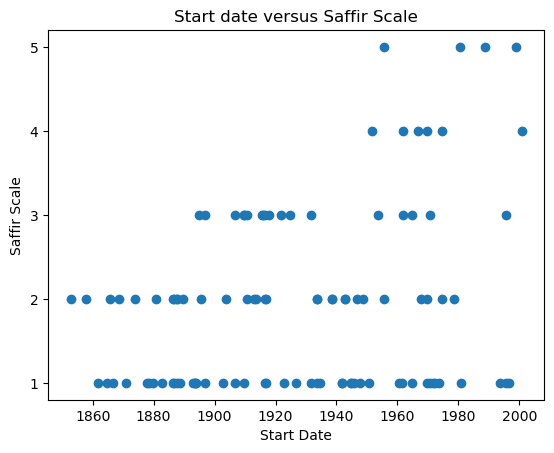

In [20]:
plt.figure()
plt.scatter(df['start.date'], df['ss'])

plt.title("Start date versus Saffir Scale")
plt.xlabel("Start Date")
plt.ylabel("Saffir Scale")

plt.yticks([1, 2, 3, 4, 5])
plt.show()